In [2]:
import os
import pickle
import sys

from data_workorders import WorkOrders

__version__ = "v0.0.19"

#from data_workorders import WorkOrders


In [3]:
import pandas as pd
#import math
import numpy as np
#import itertools
import datetime
#from matplotlib.ticker import FormatStrFormatter
from HX_vis import PlotGridBatch
from HX_stats import HistData
#from HX_vis import scatterCorrMatrix
from settings import wpiSettings, wpiImageSettings, riaSettings
import math
from HX_sml import SML_Reg


In [4]:
import matplotlib.pyplot as plt
import os, sys
import itertools
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline, FeatureUnion


In [6]:
dataDir = os.path.join("../2020 01-04/")
pklDir = os.path.join(dataDir, "pkl")
with open(os.path.join(pklDir, "raw data.pkl"), "rb") as fin:
    binTrackData, wpiDataDict, wpiImgData, riaDataLs = pd.read_pickle(fin) #pickle.load(fin)

wodatasets = WorkOrders(pklDir=pklDir)
#print(binTrackData)

In [7]:
bins=[]
for i in range(131):
    bins.append(int(i+1))
    
print(bins)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]


#### new= NoZeroData[NoZeroData['length']>100] ######

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]


C:\Users\80256269\Miniconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: MaxNLocator.set_params got an unexpected parameter: numticks
C:\Users\80256269\Miniconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


14


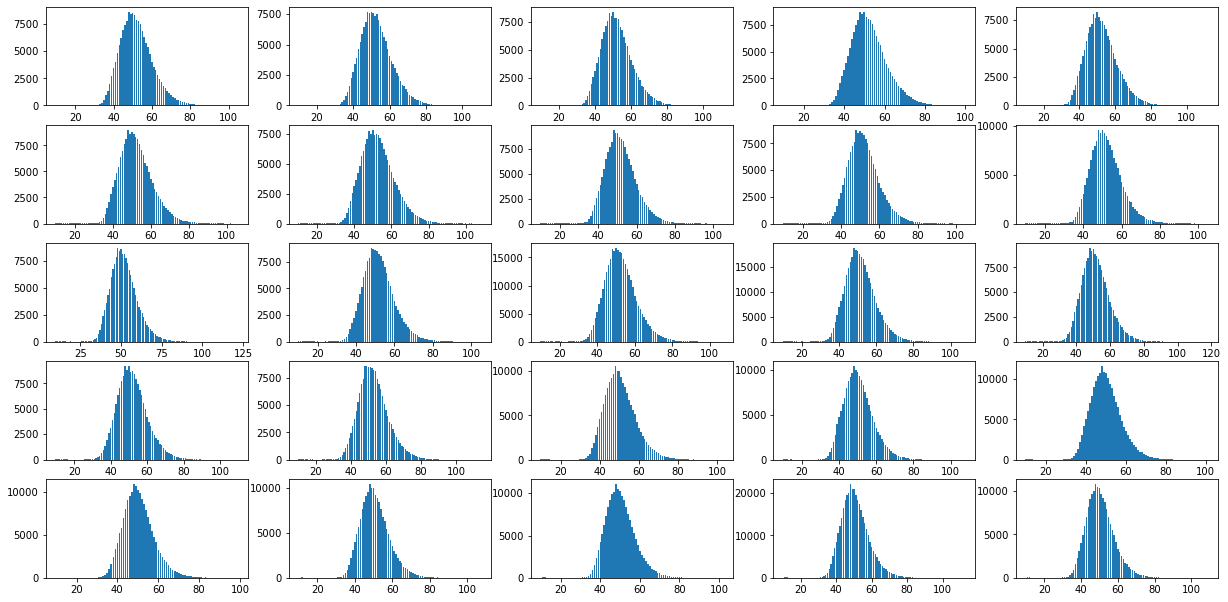

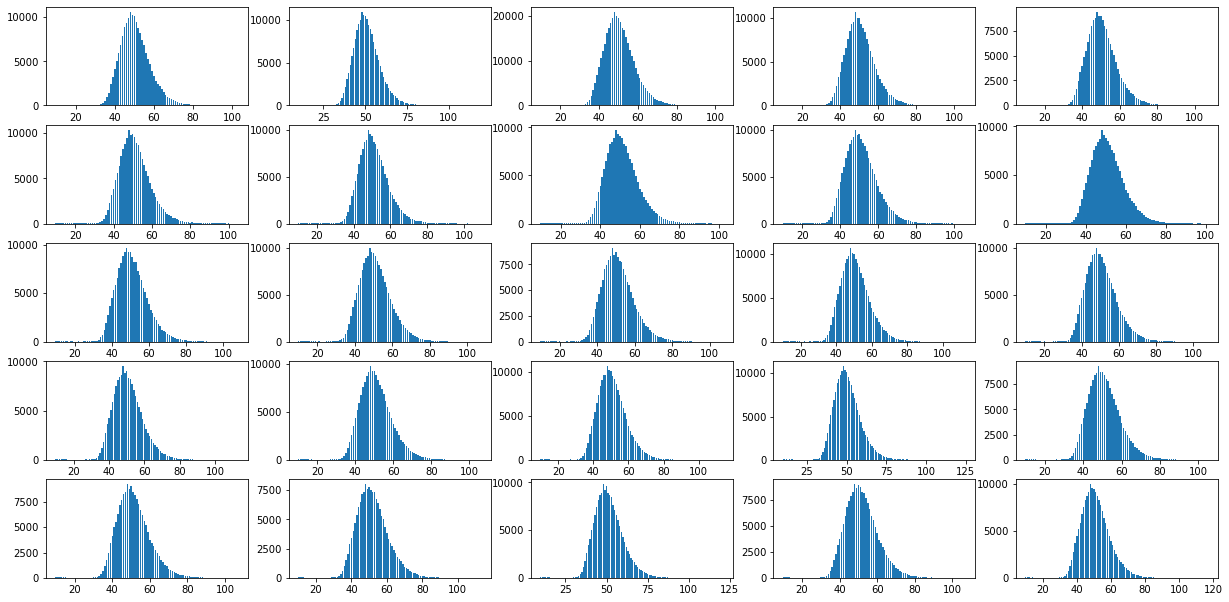

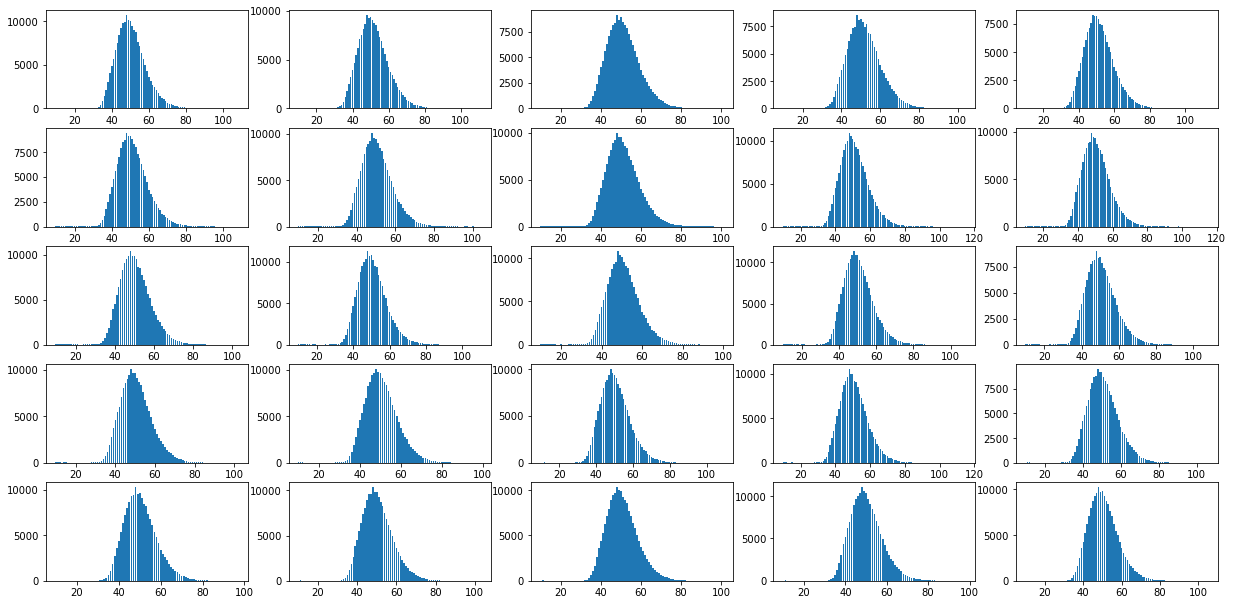

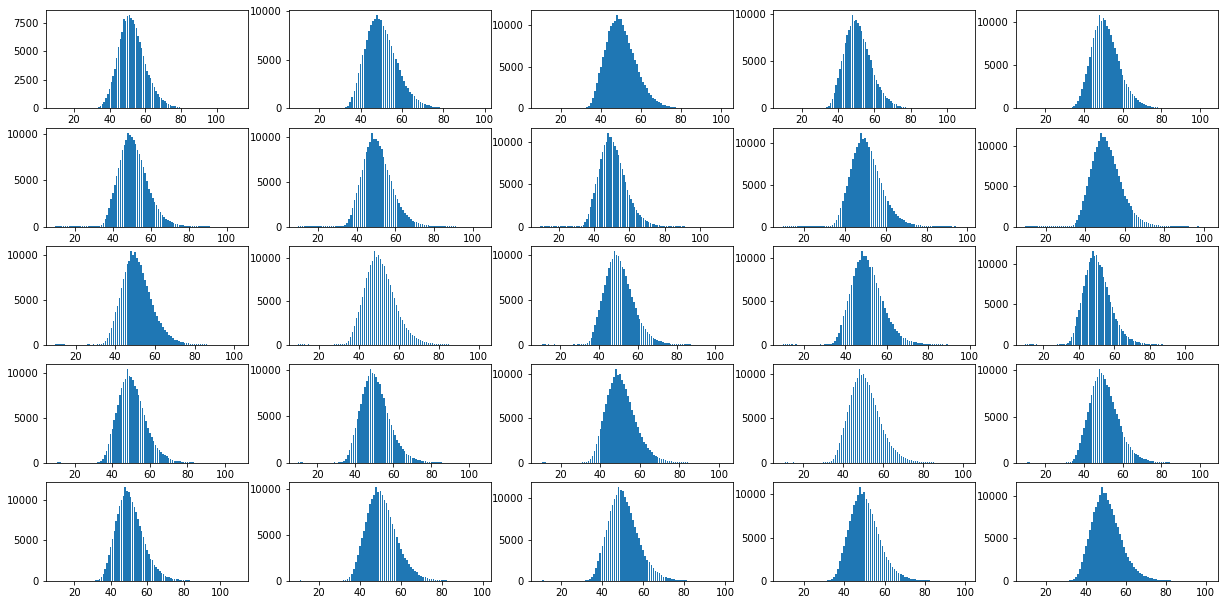

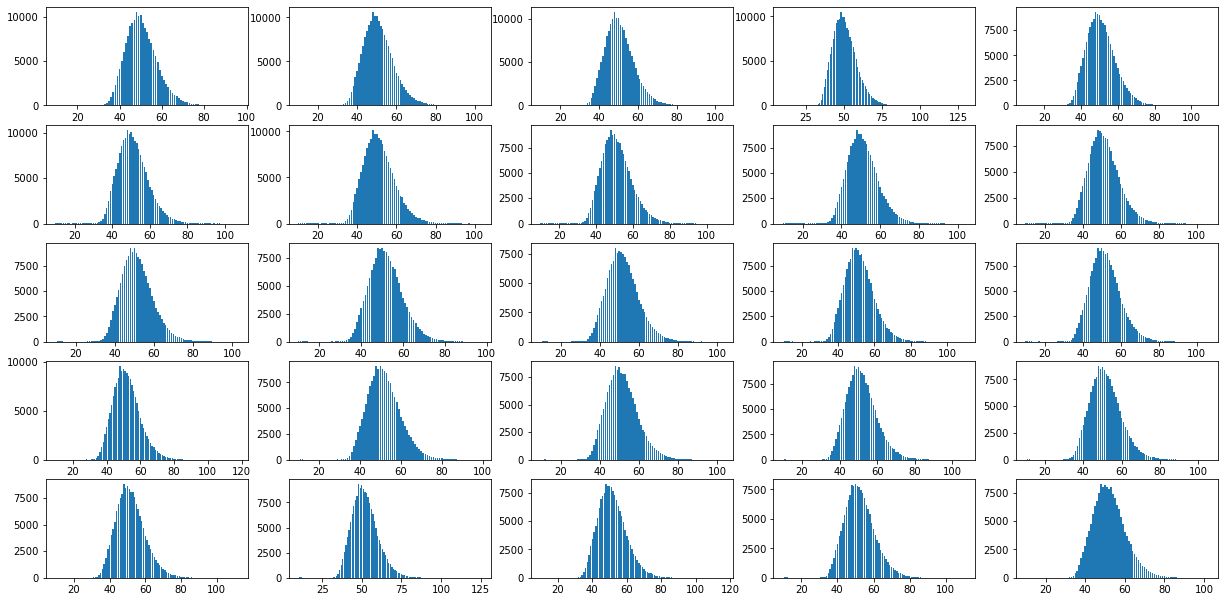

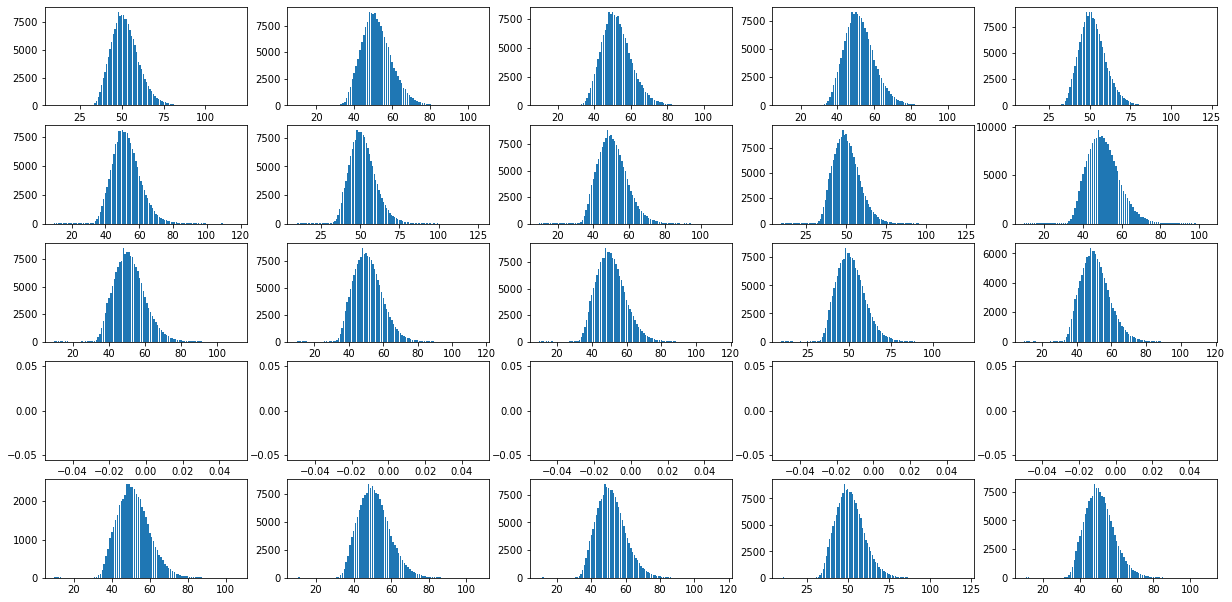

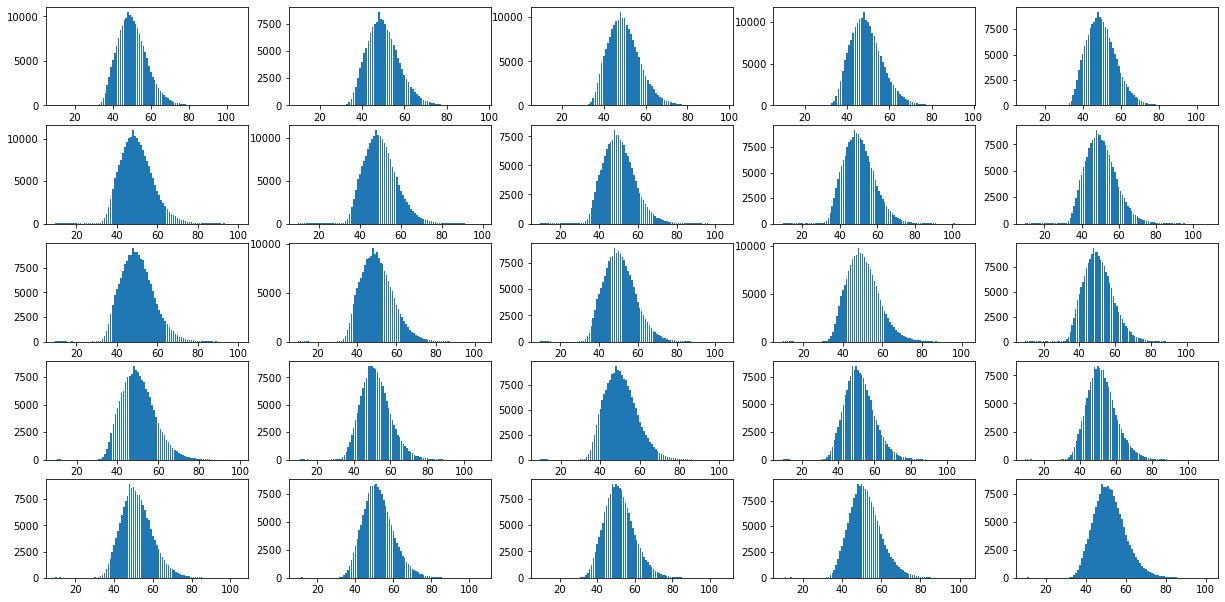

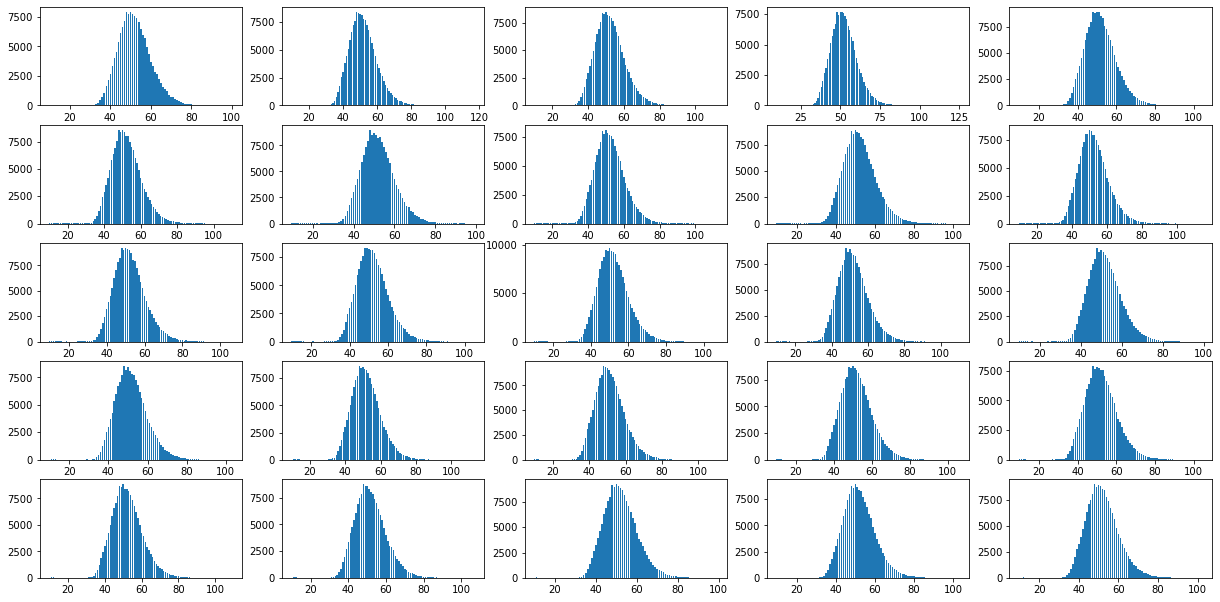

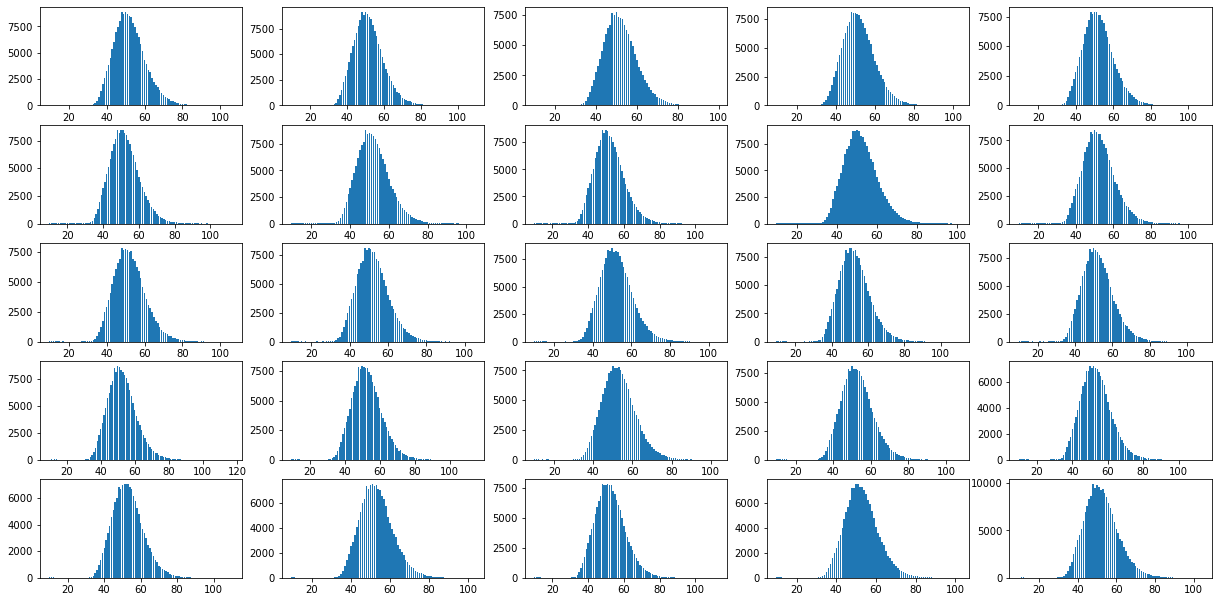

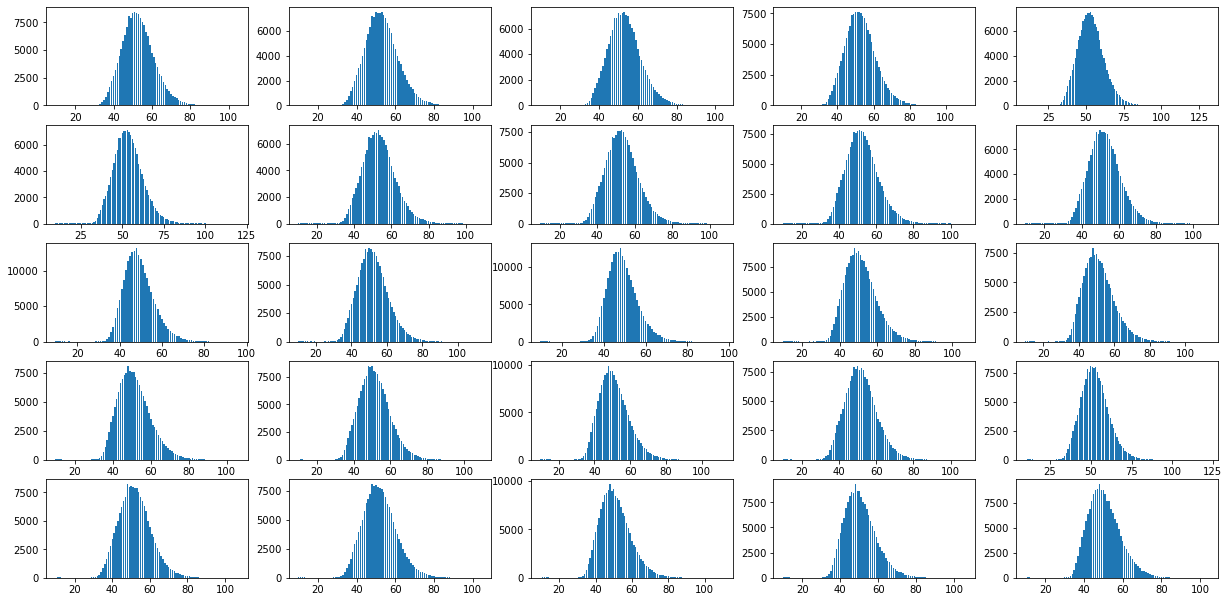

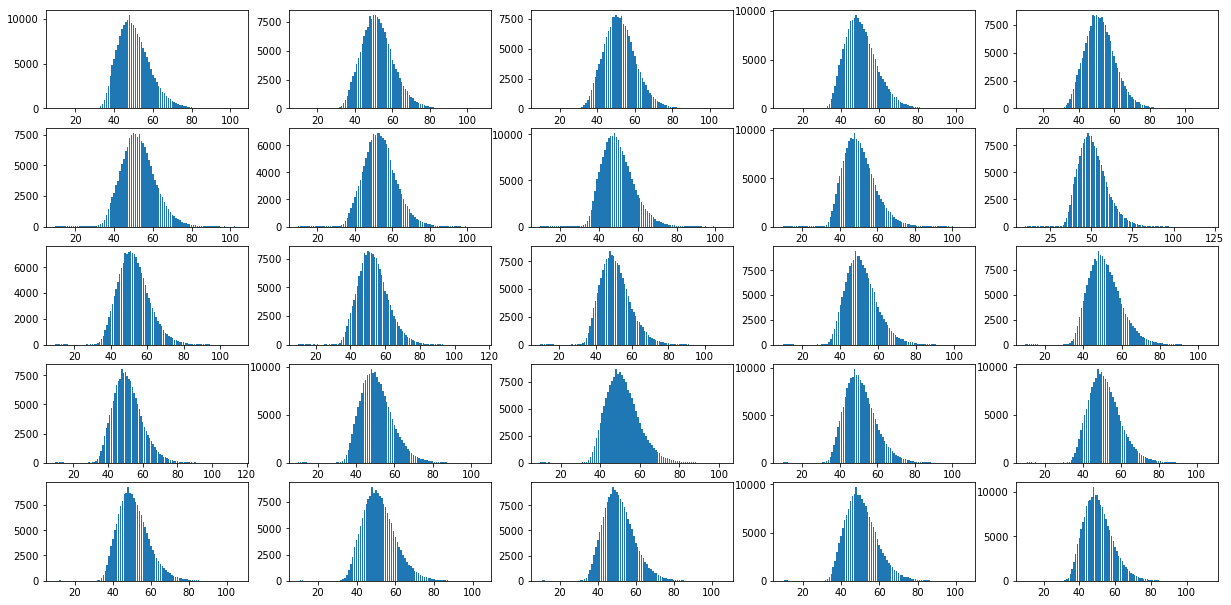

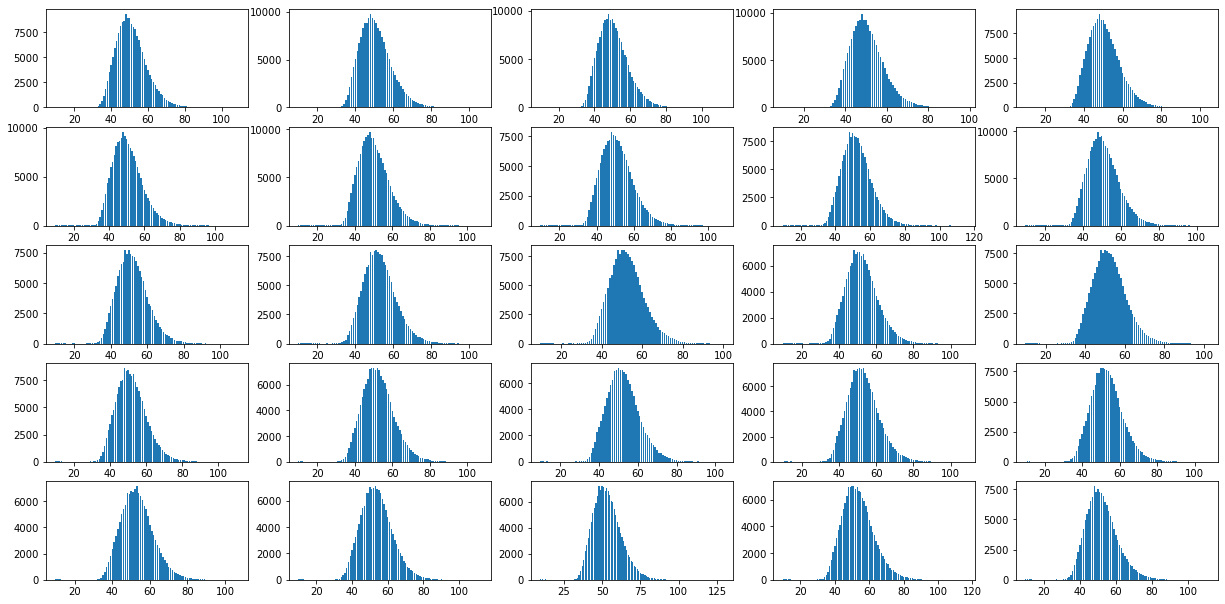

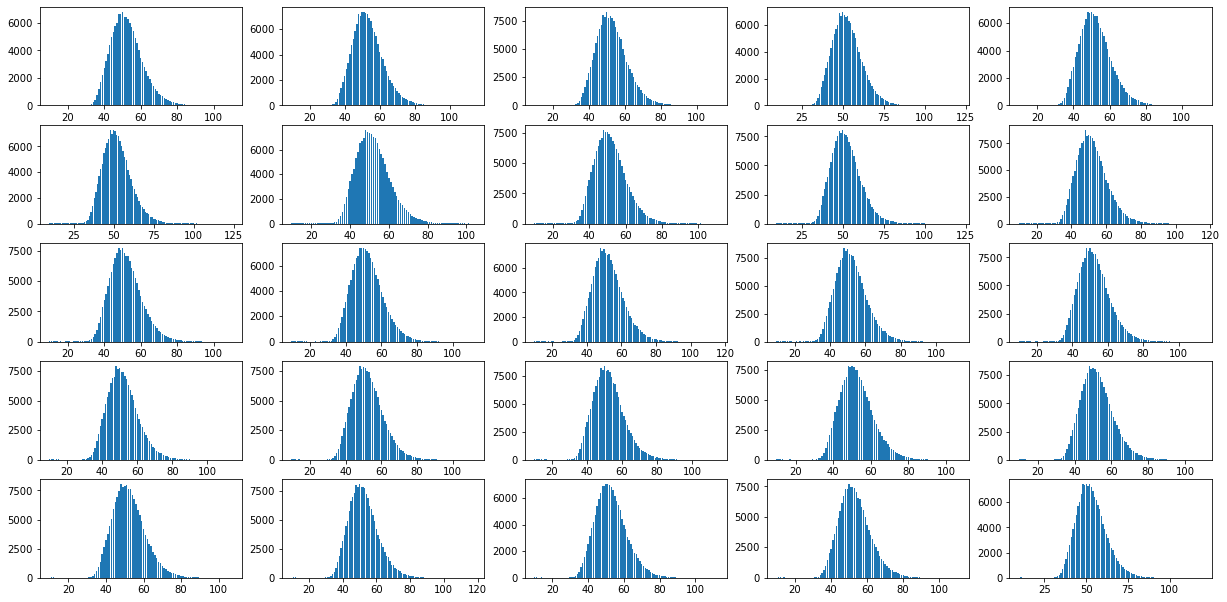

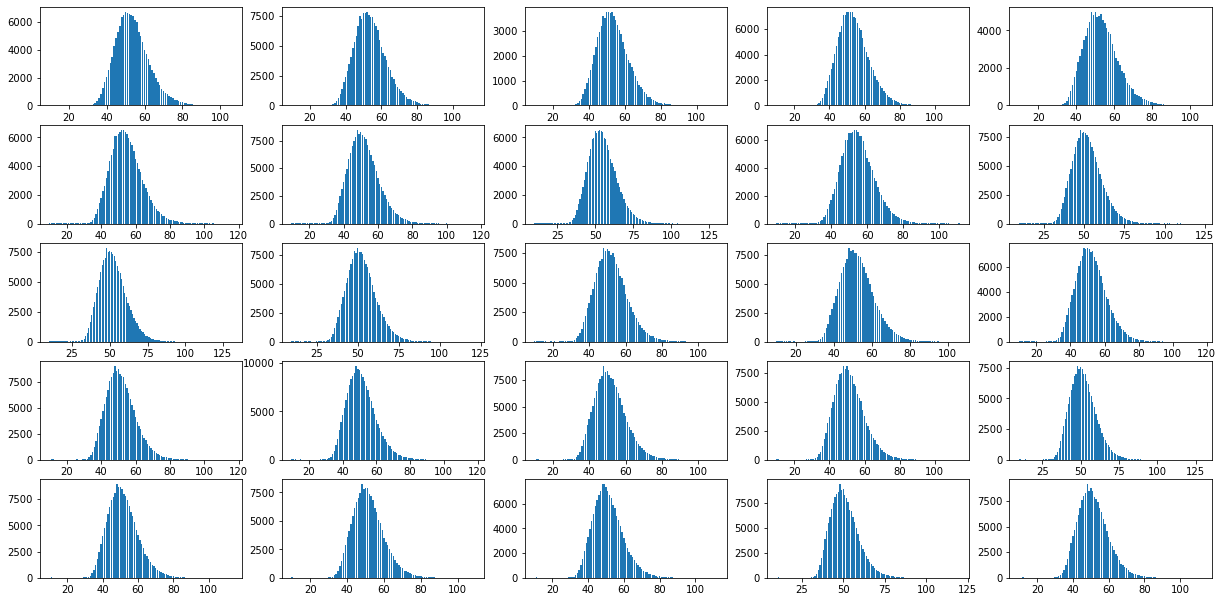

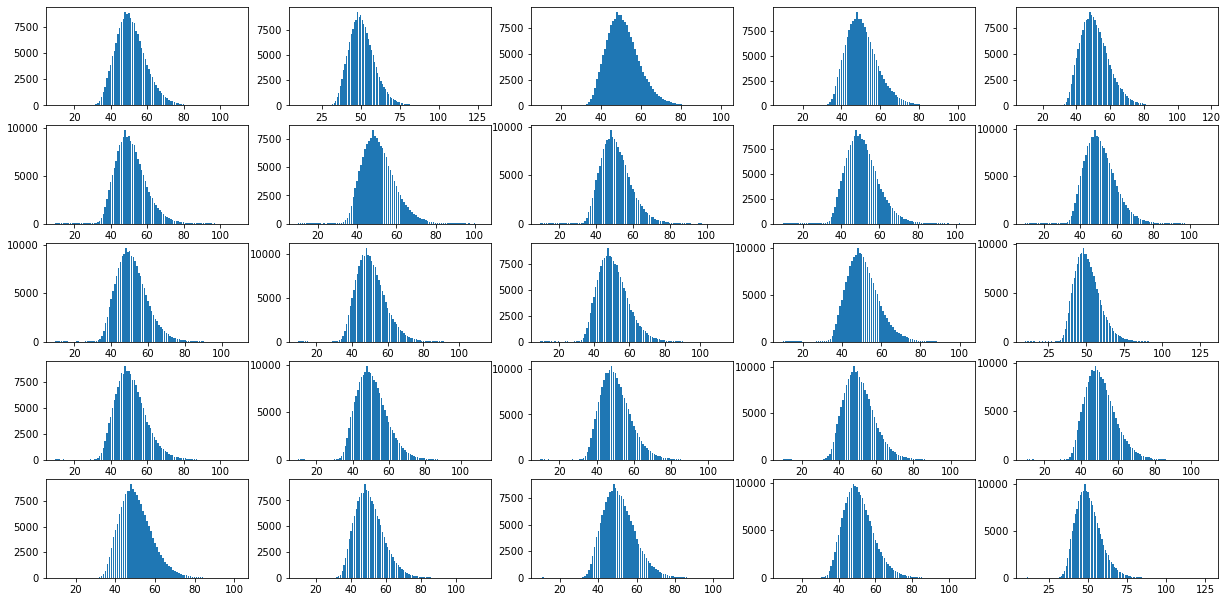

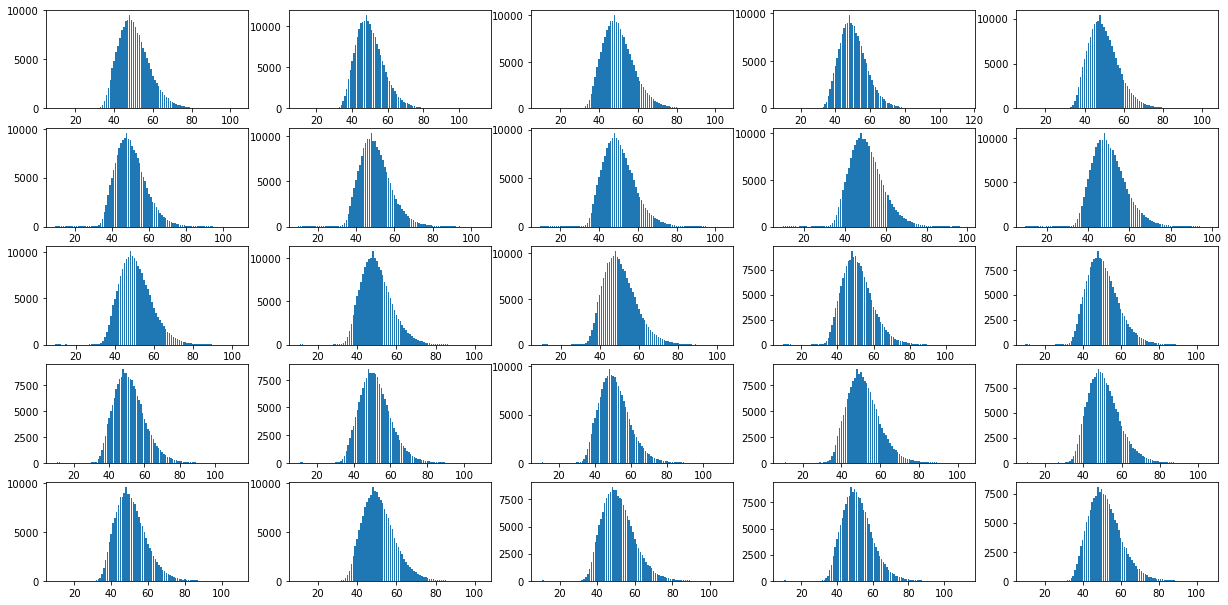

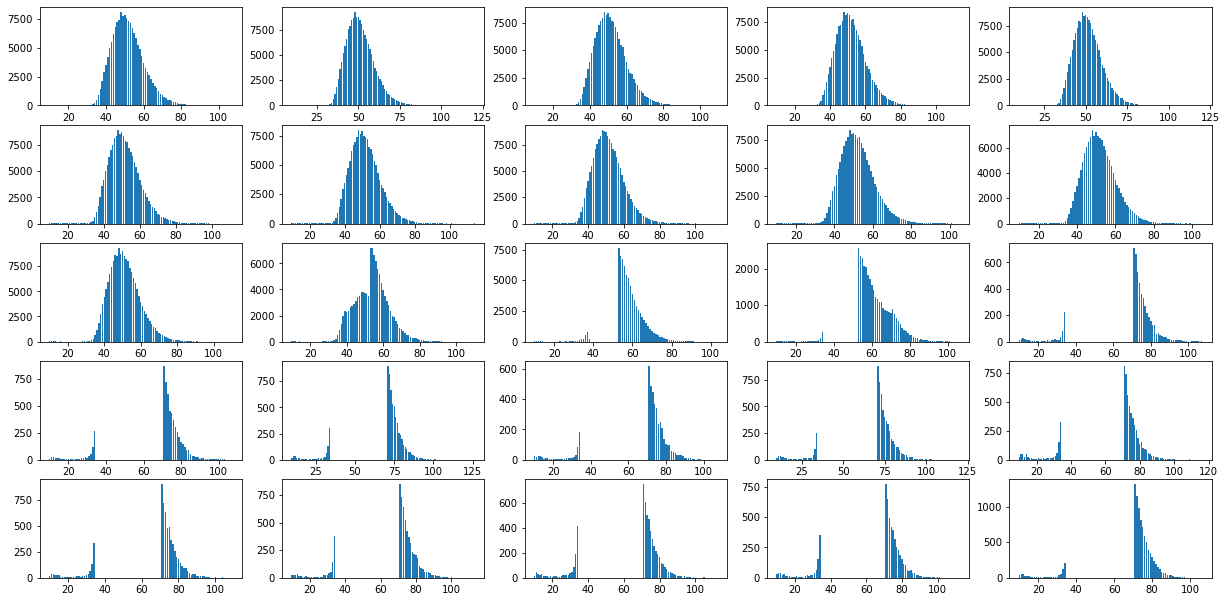

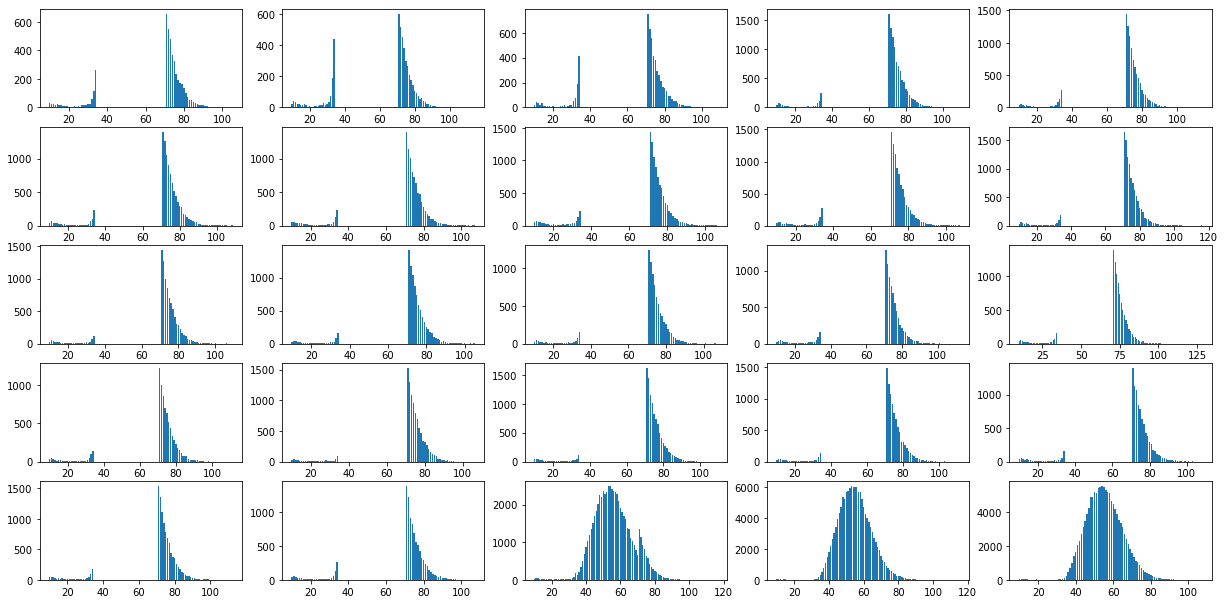

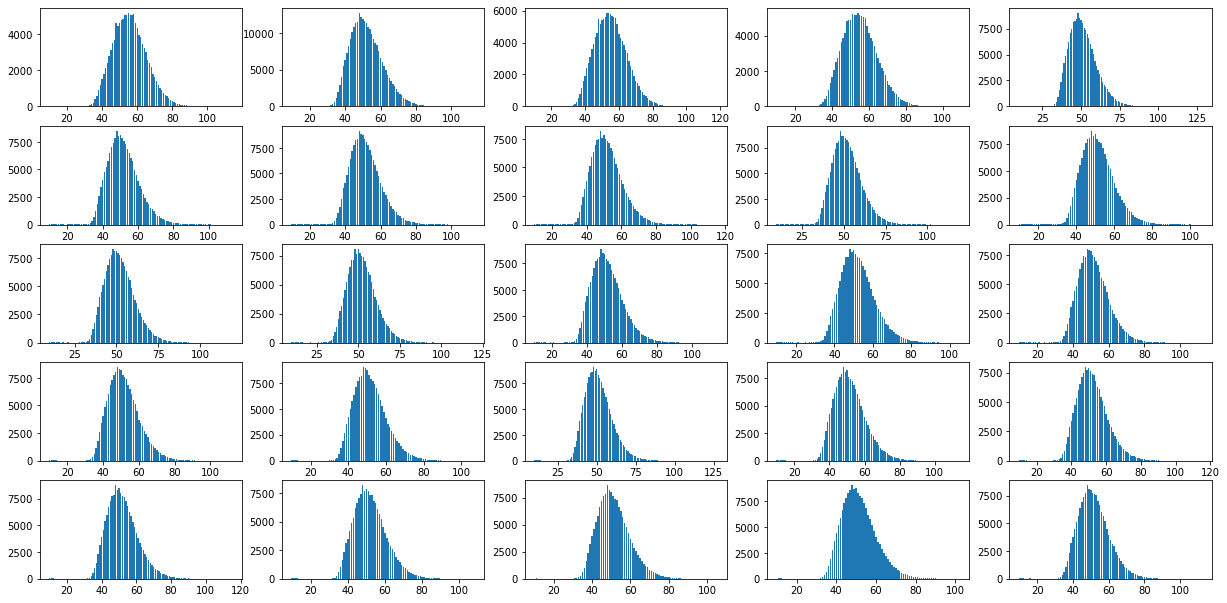

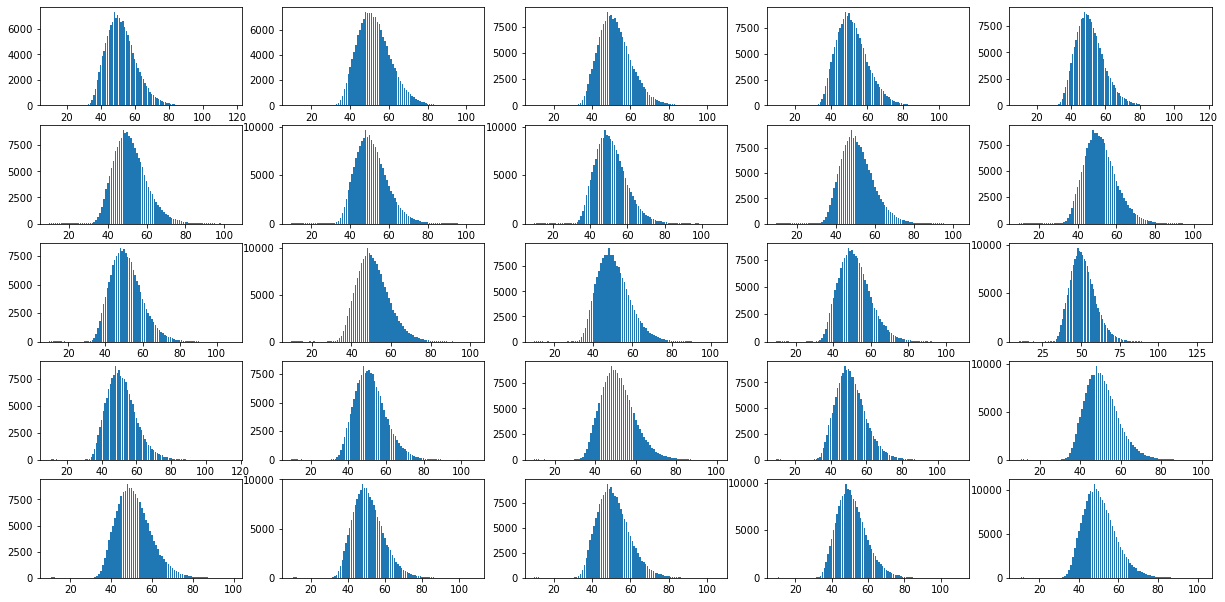

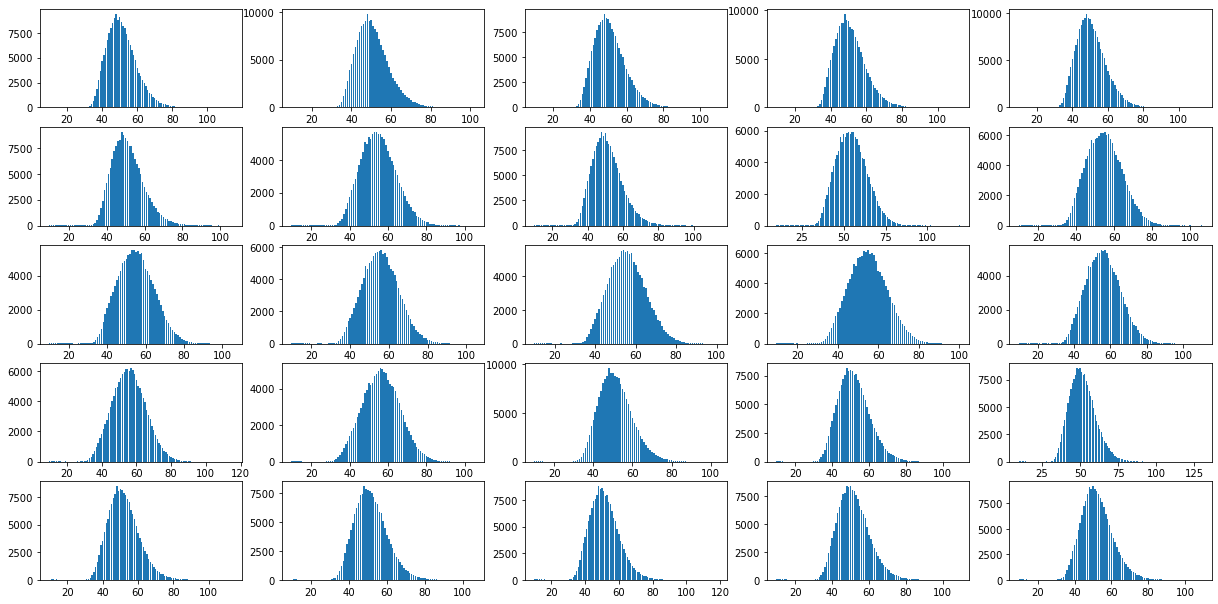

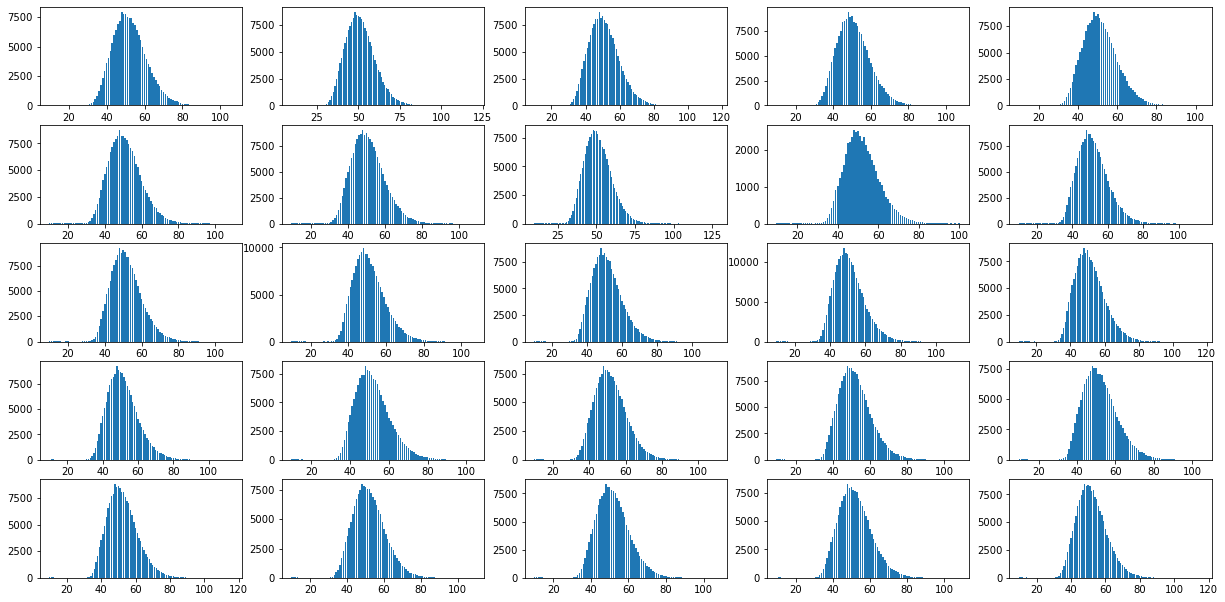

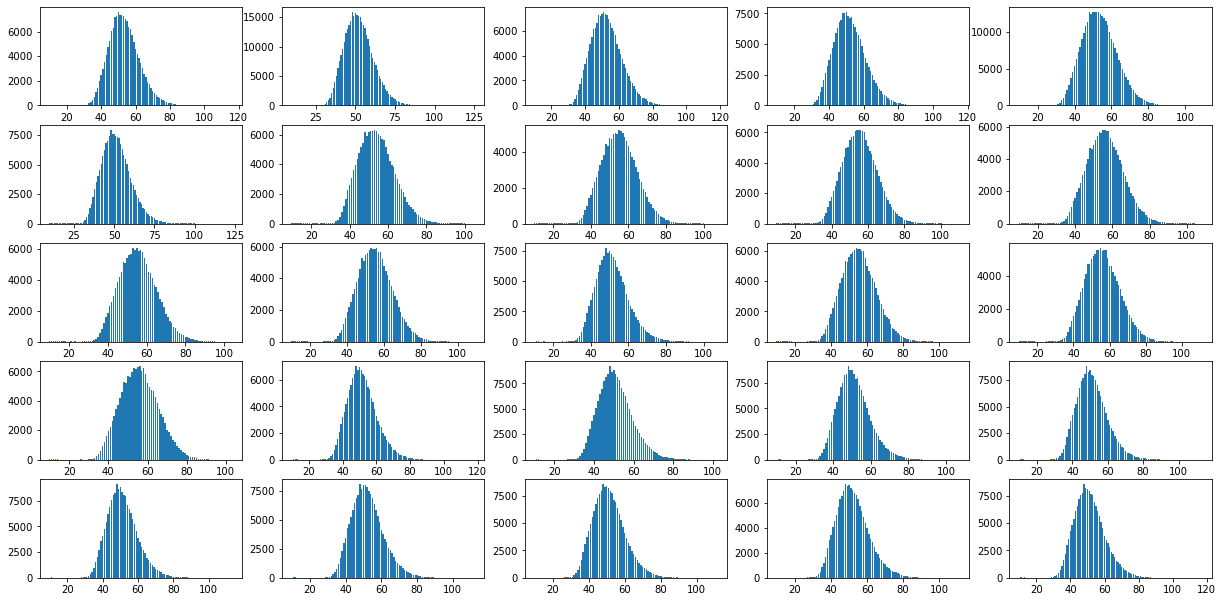

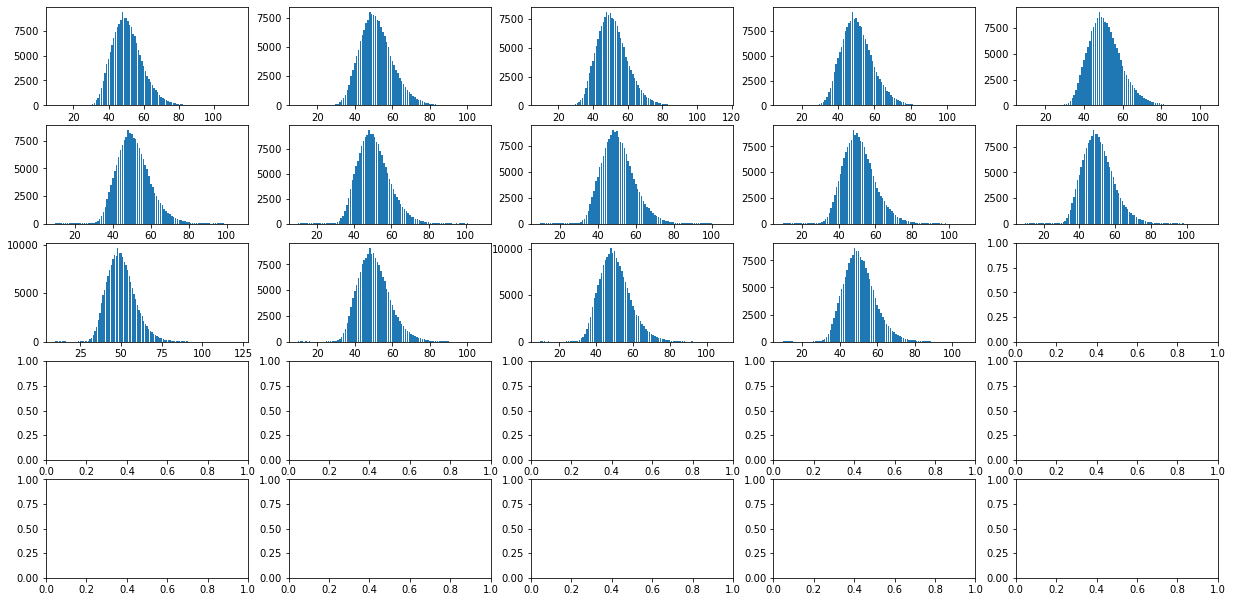

In [8]:
#### BUILDING Histograms for wpi length and width in this 

from scipy.stats import gamma
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

c=0
i=0
num=5 # SET THIS NUMBER TO DEFINE N*N SUBPLOTS
dim='width' # SET this to the histogram parameter.[Length or width]
path='C:\\Users\\80256269\\Documents\\test\\FrequencyHist\\ria_'+dim+'\\'
if not os.path.exists(path):
    os.mkdir(path)

bins=[]
for bin in range(131):
    bins.append(int(bin+1))
    
print(bins)

fig, ax = plt.subplots(num, num, sharex='row', sharey='col') #sharex='col', sharey='row'
fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(18.5, 10.5)
fig.set_size_inches(21, 10.5)
#fig = plt.figure()

i=0
for e in wodatasets.wodataLs:
    
    if(e.ria.shape[0] > 0 and e.wpi.shape[0]>0):
        
        ##STEP:1 - DATA EXTRACTION
        df_new = pd.DataFrame(e.wpi[[dim]], columns = [dim])
        #Assigning bins to X columns
        df_new['X'] = list(bins)
        #Removing rows with 0 frequency
        NoZ=df_new[~(df_new == 0).any(axis=1)]
        
        X=list(NoZ['X'])
        Y=list(NoZ[dim])
       
        c=c+1
        plt.subplot(num, num, c)
        plt.locator_params(numticks=14)
        #plt.plot(X,Y,'k-')
        plt.bar(X,Y)
        if(c==(num*num)):
            i=i+1
            
            fig.savefig((path+'fig'+str(i)))#, bbox_inches=extent.expanded(1.1, 1.2))
            ##Reassigning the plots axis to none so that new data is not added to previous plots. This creates fresh plots.
            c=0
            fig, ax = plt.subplots(num, num, sharex='row', sharey='col') #sharex='col', sharey='row'
            fig = matplotlib.pyplot.gcf()
            fig.set_size_inches(21, 10.5)

print(c)